# Logistic Regression

Logistic Regression is a statistical method used for binary classification problems. In the context of this project, we are using it to predict whether a customer will subscribe to a bank term deposit (yes or no).

**Why Logistic Regression?**
Logistic Regression is appropriate for situations where the dependent variable (also called the target variable) is binary. Unlike linear regression, which outputs continuous values, logistic regression provides the probability of the target variable belonging to a class. For example, in our case, it estimates the probability that a customer subscribes to a bank term deposit (y = 1).

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
from sklearn.feature_selection import RFE

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

In [5]:
X_train = pd.read_csv('dataset/X_train_smote.csv.', sep = ';')
y_train = pd.read_csv('dataset/y_train_smote.csv.', sep = ';')
X_test = pd.read_csv('dataset/X_test.csv.', sep = ';')
y_test = pd.read_csv('dataset/y_test.csv.', sep = ';')

In [6]:
print(X_train.shape)
print(y_train.shape)

(38359, 55)
(38359, 1)


In [7]:
print(X_test.shape)
print(y_test.shape)

(6096, 55)
(6096, 1)


## Logistic Regression Model

In [8]:
log_reg = LogisticRegression(random_state=42)

In [9]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
y_pred_log_reg = log_reg.predict(X_test)

In [11]:
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  

In [12]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.9004265091863517
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5309
           1       0.63      0.55      0.59       787

    accuracy                           0.90      6096
   macro avg       0.78      0.75      0.76      6096
weighted avg       0.90      0.90      0.90      6096



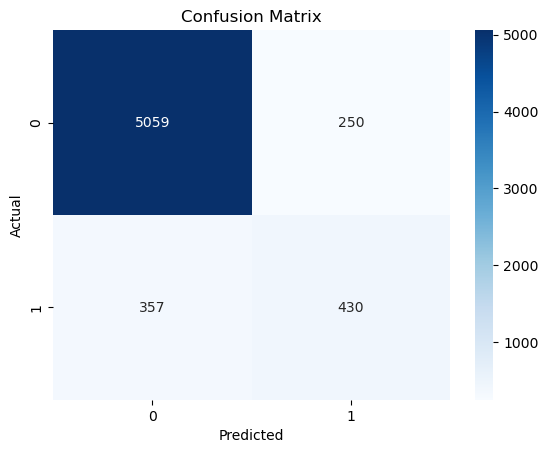

In [13]:
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg_proba)

In [15]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg_proba)

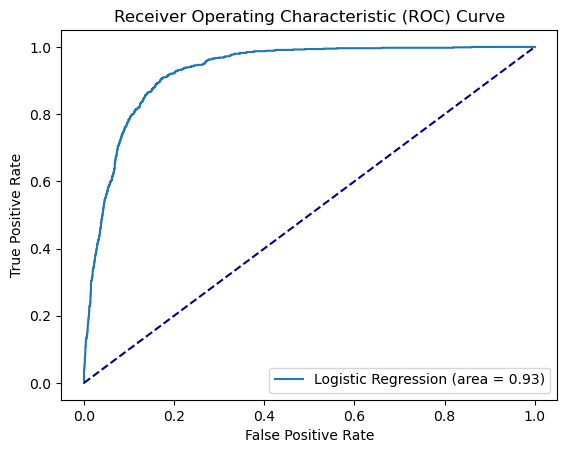

In [16]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Feature Importance in Logistic Regression

In Logistic Regression, feature importance is determined by the magnitude of the model’s coefficients (coef_). The coefficients represent the influence of each feature on the model’s predictions.

In [17]:
# Get the coefficients of the model
coefficients = log_reg.coef_[0]

In [18]:
# Assuming X_train_smote is a DataFrame, get the feature names
feature_names = X_train.columns

# Create a DataFrame with the feature names and their corresponding coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [19]:
# Sort by absolute value of coefficients to see the most important features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

The coefficients in Logistic Regression indicate the strength and direction of the relationship between each feature and the target variable.
* A **positive coefficient** means that as the value of the feature increases, the likelihood of the target being 1 (subscribed) also increases, holding all other features constant.
* A **negative coefficient** implies the opposite: as the value of the feature increases, the likelihood of the target being 1 decreases, holding all other features constant.

In [20]:
# Display the feature importance
print(importance_df[['Feature', 'Coefficient']])

                          Feature  Coefficient
29                     default_no     5.868242
48                day_of_week_mon    -4.122268
47                day_of_week_fri    -4.095026
31                     housing_no    -4.052776
49                day_of_week_thu    -4.017613
32                    housing_yes    -3.994320
10               job_entrepreneur    -3.859353
51                day_of_week_wed    -3.852259
50                day_of_week_tue    -3.804545
43                      month_may    -3.781681
19               marital_divorced    -3.740049
9                 job_blue-collar    -3.640974
21                 marital_single    -3.571707
15                   job_services    -3.538163
20                marital_married    -3.531879
25          education_high.school    -3.504988
22             education_basic.4y    -3.491023
23             education_basic.6y    -3.438683
12                 job_management    -3.383552
27  education_professional.course    -3.376430
17           

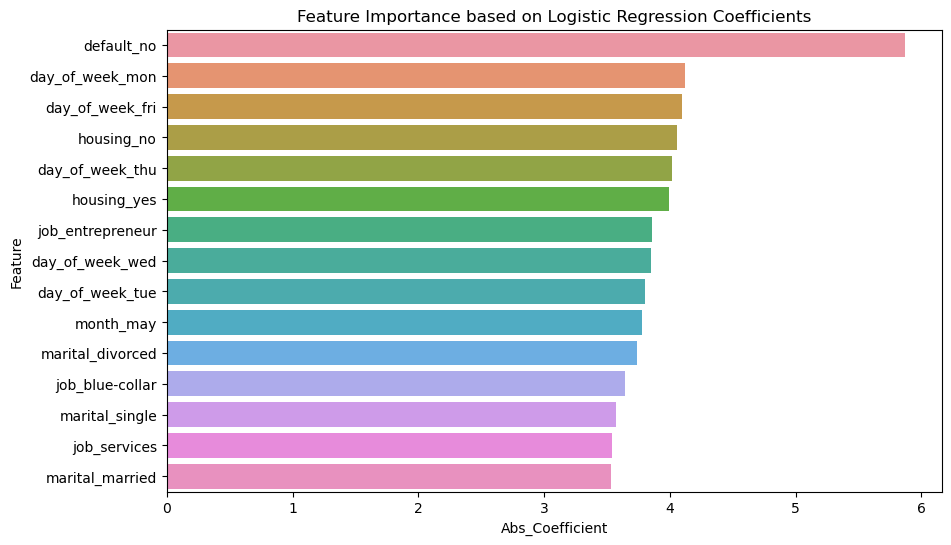

In [21]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df.head(15))
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

In [22]:
var_important = list(importance_df.Feature.head(15))

In [23]:
X_train_vi = X_train[var_important]
X_test_vi = X_test[var_important]

In [24]:
log_reg.fit(X_train_vi, y_train)

LogisticRegression(random_state=42)

In [25]:
y_pred_lr_if = log_reg.predict(X_test_vi)

In [26]:
y_pred_lr_if_proba = log_reg.predict_proba(X_test_vi)[:, 1]

In [27]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_if))
print(classification_report(y_test, y_pred_lr_if))

Logistic Regression Performance:
Accuracy: 0.8708989501312336
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5309
           1       0.00      0.00      0.00       787

    accuracy                           0.87      6096
   macro avg       0.44      0.50      0.47      6096
weighted avg       0.76      0.87      0.81      6096



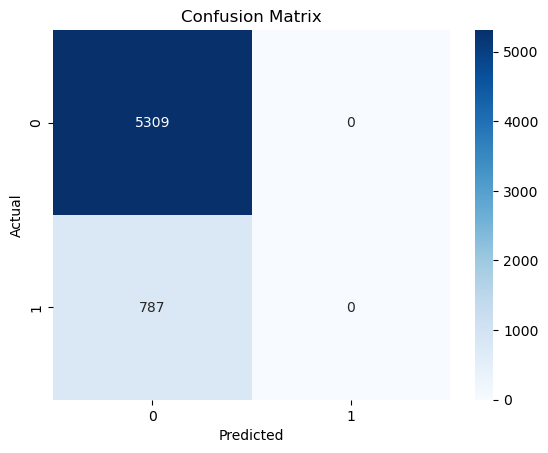

In [28]:
cm = confusion_matrix(y_test, y_pred_lr_if)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
roc_auc_lr_if = roc_auc_score(y_test, y_pred_lr_if_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_if_proba)

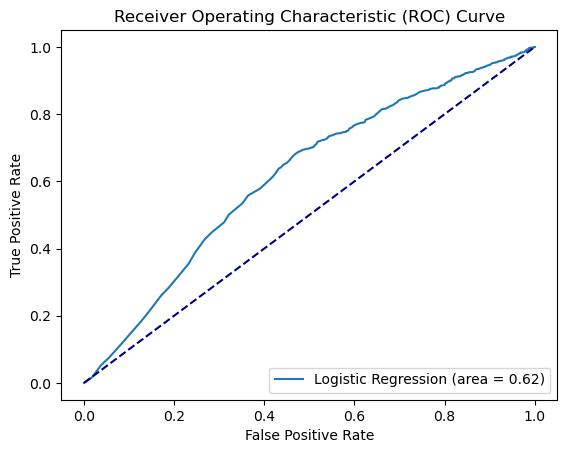

In [30]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr_if)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique that aims to select the most important features from a dataset by recursively eliminating less significant features. It is commonly used to reduce the dimensionality of data and improve model performance by focusing only on the most relevant features.

In [31]:
rfe = RFE(log_reg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [32]:
# Columns with RFE Support as True
col = X_train.columns[rfe.support_]

In [33]:
print(len(col), col)

15 Index(['marital_divorced', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_professional.course', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')


In [34]:
# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['marital_divorced', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_professional.course', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')


In [35]:
# Create a simple DataFrame to associate feature names with importance rank
feature_importance_rfe = pd.Series(range(15, 0, -1), index=selected_features)

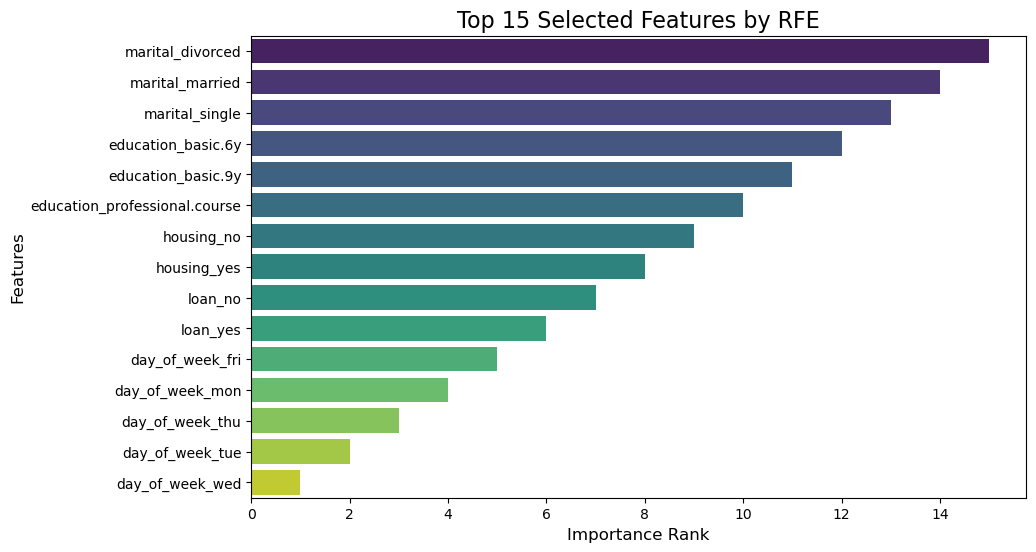

In [36]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rfe.values, y=feature_importance_rfe.index, palette="viridis")
plt.title('Top 15 Selected Features by RFE', fontsize=16)
plt.xlabel('Importance Rank', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [37]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [38]:
logreg_rfe = LogisticRegression(random_state = 100)
logreg_rfe = logreg_rfe.fit(X_train_rfe, y_train)

In [39]:
y_pred_lr_rfe = logreg_rfe.predict(X_test_rfe)
y_pred_lr_rfe_proba = logreg_rfe.predict_proba(X_test_rfe)[:, 1]

In [40]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_rfe))
print(classification_report(y_test, y_pred_lr_rfe))

Logistic Regression Performance:
Accuracy: 0.8708989501312336
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5309
           1       0.00      0.00      0.00       787

    accuracy                           0.87      6096
   macro avg       0.44      0.50      0.47      6096
weighted avg       0.76      0.87      0.81      6096



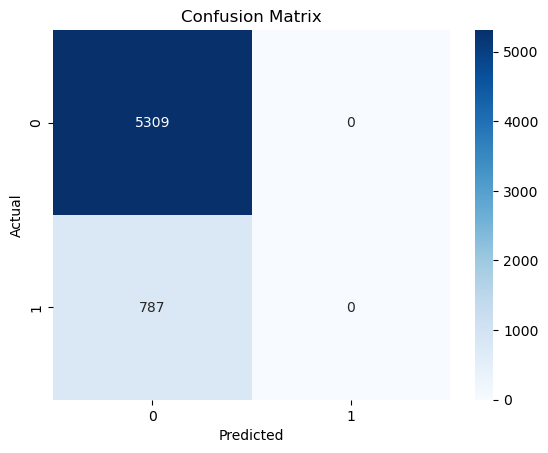

In [41]:
cm = confusion_matrix(y_test, y_pred_lr_rfe)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
roc_auc_rfe = roc_auc_score(y_test, y_pred_lr_rfe_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_rfe_proba)

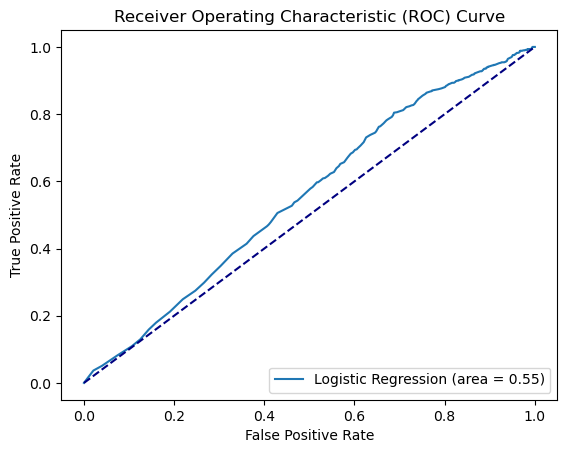

In [43]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_rfe)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## LASSO (L1 Regularization)

Lasso Regression, short for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes regularization. Regularization is used to prevent overfitting by penalizing large coefficients, thus improving the generalization of the model to new data. Lasso achieves this through L1 regularization, which can drive some feature coefficients to exactly zero, effectively performing feature selection.

In [44]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [46]:
# Coefficients of the features
lasso_coef = pd.Series(lasso.coef_[0], index=X_train.columns)
print("Features selected by Lasso:\n", lasso_coef[lasso_coef != 0])

Features selected by Lasso:
 age                              -0.030222
euribor3m                        -1.296372
duration                          1.386783
cons.conf.idx                     0.234617
previous                          4.213692
cons.price.idx                    0.240848
campaign                         -0.123095
job_admin.                       -4.825444
job_blue-collar                  -5.248342
job_entrepreneur                 -5.384898
job_housemaid                    -5.011143
job_management                   -5.020427
job_retired                      -4.666976
job_self-employed                -4.973984
job_services                     -5.140416
job_student                      -4.658059
job_technician                   -5.002633
job_unemployed                   -4.997988
marital_divorced                 -5.085772
marital_married                  -4.888486
marital_single                   -4.925045
education_basic.4y               -4.908618
education_basic.6y       

In [47]:
# Filter the coefficients
important_features_lasso = lasso_coef[lasso_coef != 0]

In [48]:
lasso_coef_abs = important_features_lasso.abs()

In [49]:
# Sort the coefficients by their values
important_features_lasso = lasso_coef_abs.sort_values(ascending=False).head(15)

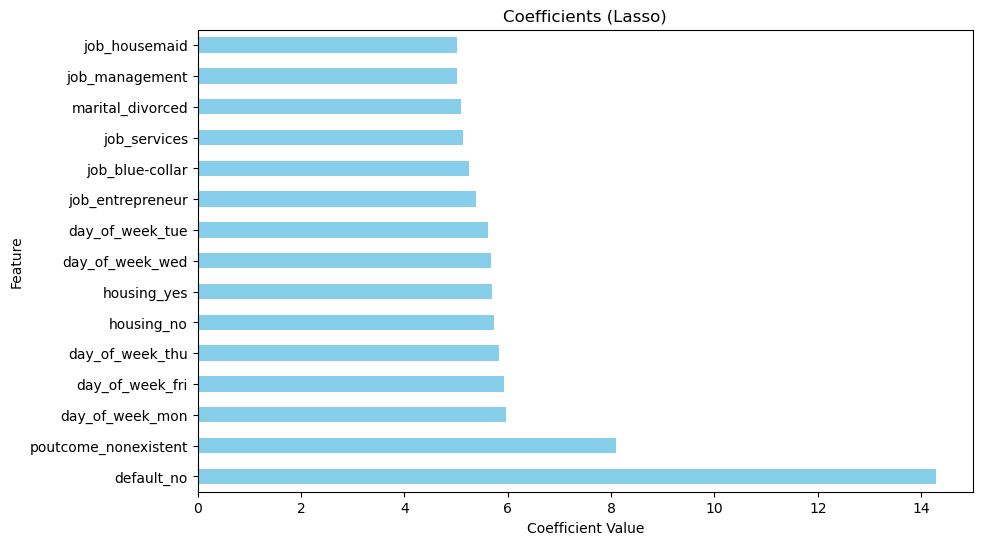

In [50]:
# Plot the positive coefficients
plt.figure(figsize=(10, 6))
important_features_lasso.plot(kind='barh', color='skyblue')
plt.title('Coefficients (Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [51]:
X_train_lasso = X_train[important_features_lasso.index]
X_test_lasso = X_test[important_features_lasso.index]

In [52]:
lasso.fit(X_train_lasso, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [53]:
y_pred_lasso = lasso.predict(X_test_lasso)
y_pred_lasso_proba = lasso.predict_proba(X_test_lasso)[:, 1] 

In [54]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

Logistic Regression Performance:
Accuracy: 0.847769028871391
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5309
           1       0.35      0.22      0.27       787

    accuracy                           0.85      6096
   macro avg       0.62      0.58      0.59      6096
weighted avg       0.82      0.85      0.83      6096



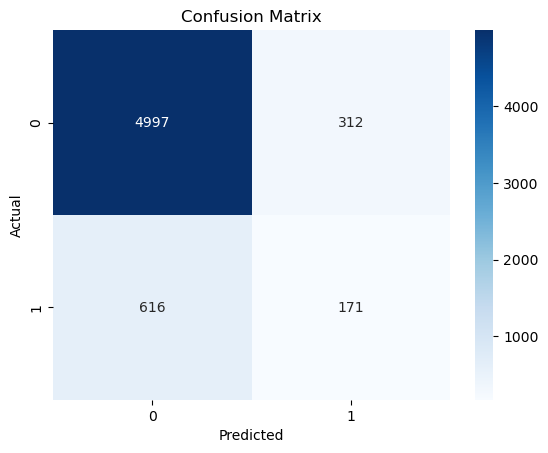

In [55]:
cm = confusion_matrix(y_test, y_pred_lasso)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
roc_auc_lasso = roc_auc_score(y_test, y_pred_lasso_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lasso_proba)

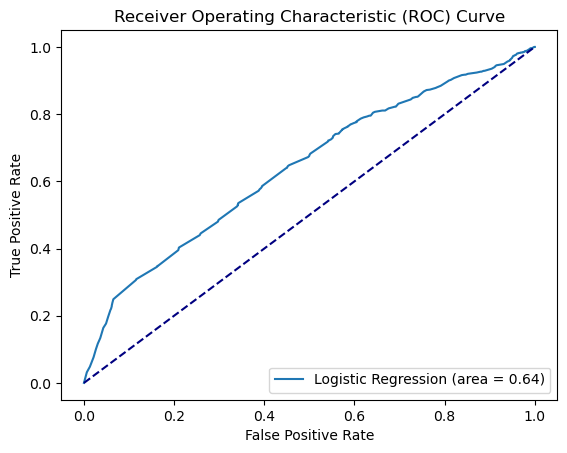

In [57]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lasso)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Unlike model parameters (which are learned from the data, such as the coefficients in linear regression), hyperparameters are set before training begins and guide the learning process.

In [58]:
# Create the param grid for logistic regression
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'penalty': ['l1', 'l2'],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}

In [59]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [60]:
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

In [61]:
grid = GridSearchCV(estimator = log_reg, scoring='roc_auc', param_grid = lr_param_grid, cv = folds, 
                       verbose=0, return_train_score=True, n_jobs=3)


In [62]:
grid.fit(X_train_vi, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=3,
             param_grid={'C': [0.5, 1, 1.5], 'max_iter': [75, 100, 125],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             return_train_score=True, scoring='roc_auc')

In [63]:
# Get the best parameters
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 'solver': 'liblinear'}


In [65]:
# Evaluate the best model
best_model = grid.best_estimator_

In [66]:
y_pred_lr = best_model.predict(X_test_vi)
y_pred_lr_proba = best_model.predict_proba(X_test_vi)[:, 1]

In [67]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.8708989501312336
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5309
           1       0.00      0.00      0.00       787

    accuracy                           0.87      6096
   macro avg       0.44      0.50      0.47      6096
weighted avg       0.76      0.87      0.81      6096



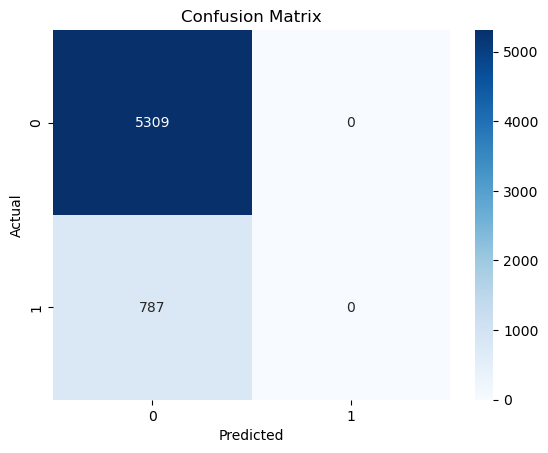

In [68]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

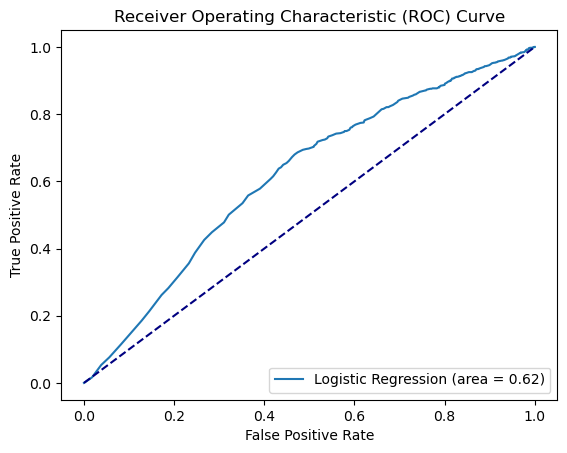

In [69]:
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()